# Assignment 1: PCA

# [NO MARKS] PCA Warming Up (MUST READ)

Some code to illustrate examples of PCA using sklearn library.

**Let's create some random `5d` data**

In [0]:
import numpy as np
from sklearn.decomposition import PCA

# 100 points of 5d data
data = np.random.rand(100, 5)

**Lets convert this `5d` data to `2d` using `PCA`**


In [2]:
# n_components=2 because I want to convert 5d data to 2d (dimensionality reduction)
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In code above when we call `fit`, it populates two things in `pca`:
1. `mean_`
2. `components_`

In [3]:
# mean of the input data (per dimension) used to zeroying the mean
pca.mean_

array([0.50930459, 0.46978465, 0.54463792, 0.50745539, 0.47209205])

In [4]:
# basis vectors
pca.components_

array([[ 0.68377365, -0.11806064,  0.20778721, -0.4900512 , -0.48496348],
       [ 0.42503173, -0.64935915,  0.1454261 ,  0.26207154,  0.55484275]])

Now we are ready to transform `5d` from `data` into `2d` using following code

In [5]:
data_to_reduce = data[:10]
reduced_data = np.dot(data_to_reduce - pca.mean_, pca.components_.T)

# reduced data from 5d to 2d
reduced_data.shape

(10, 2)

You can accomplish the same using `transform` function provided in `pca`

In [6]:
pca.transform(data_to_reduce).shape

(10, 2)

Time for inverse transform or changing `2d` data back to `5d`

Compression --> Decompression

In [7]:
decompressed_data = np.dot(reduced_data, pca.components_)+pca.mean_
decompressed_data

array([[0.37396547, 0.25950585, 0.51010912, 0.83433025, 0.9154412 ],
       [0.90905945, 0.25137841, 0.67033543, 0.36793227, 0.4106563 ],
       [0.54911804, 0.32482117, 0.56063636, 0.61478434, 0.64915079],
       [0.10254965, 0.7393325 , 0.41540303, 0.60286751, 0.46425759],
       [0.92571209, 0.35754807, 0.67231633, 0.2487109 , 0.23672926],
       [0.69749134, 0.40897963, 0.60262426, 0.40044062, 0.38071356],
       [0.53561524, 0.72938203, 0.54517364, 0.22871774, 0.06073614],
       [0.206269  , 0.70423328, 0.44740708, 0.54544708, 0.41625281],
       [0.57205427, 0.34275743, 0.56698791, 0.57680288, 0.6003301 ],
       [0.62411898, 0.16417041, 0.58759913, 0.70635171, 0.81554274]])

In [8]:
# same can we accomplished using inverse_transform
pca.inverse_transform(pca.transform(data_to_reduce))

array([[0.37396547, 0.25950585, 0.51010912, 0.83433025, 0.9154412 ],
       [0.90905945, 0.25137841, 0.67033543, 0.36793227, 0.4106563 ],
       [0.54911804, 0.32482117, 0.56063636, 0.61478434, 0.64915079],
       [0.10254965, 0.7393325 , 0.41540303, 0.60286751, 0.46425759],
       [0.92571209, 0.35754807, 0.67231633, 0.2487109 , 0.23672926],
       [0.69749134, 0.40897963, 0.60262426, 0.40044062, 0.38071356],
       [0.53561524, 0.72938203, 0.54517364, 0.22871774, 0.06073614],
       [0.206269  , 0.70423328, 0.44740708, 0.54544708, 0.41625281],
       [0.57205427, 0.34275743, 0.56698791, 0.57680288, 0.6003301 ],
       [0.62411898, 0.16417041, 0.58759913, 0.70635171, 0.81554274]])

In [9]:
# Lets find compression decompression error (absolute mean error)
np.sum(np.abs(data_to_reduce - decompressed_data))/data_to_reduce.size

0.16609210432506935

## Questions [8 marks]

Answer the questions below as follows:

1) What is 2+2
- 4
- 5
- 6

In [10]:
ans1 = 4
ans1

4

2) (2 marks) For a n-D data, you can ALWAYS reconstruct the data with 0\% error if all `n` PCAs are used.
- True
- False

In [11]:
# write True or False and run this cell using (Shift + Enter)
ans2 = True
ans2

True

3) (2 marks) From the 2nd tutorial, we ran PCA alorithm on faces. We called the extracted PCs--Eigenfaces. What is the value of a dot product between arbitary two eigen faces?

In [12]:
ans3 = 0
ans3

0

4) (4 marks) Using the probablity, find the expected value for the function below:

**Note:** Lets say for a coin toss, head = 0 and tail = 1. Then the expected value for a coin-toss will be `p(x=tail)*1 + p(x=head)*0 = 1/2*1 = 0.5`.

In [13]:
import operator as op
from functools import reduce

def func():
    arr = [49, 8, 48, 15, 47, 4, 16, 23, 43, 44, 42, 45, 46]
    np.random.shuffle(arr)
    return min(arr[0:6])

def nchooser(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer / denom

numerator = 4*nchooser(12,5) + 8*nchooser(11,5) + 15*nchooser(10,5) + 16*nchooser(9,5) + 23*nchooser(8,5) + 42*nchooser(7,5) + 43*nchooser(6,5) + 44*nchooser(5,5)
denominator = nchooser(13,6)

expected = numerator / denominator
expected

8.818181818181818

## Programming Tasks [92 marks]
### Task 1: Building an Image Compression Algorithm

In this section you will build you own compression algorithm for images using PCA.

**STEP 1: Read the image**
1. Use `imread` function from `skimage.io` to read `leena.jpg`.
2. Show the image using `show_image` function provided to you

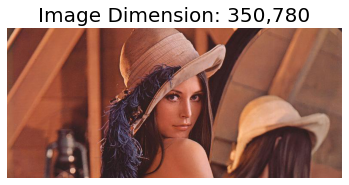

In [14]:
import matplotlib.pyplot as plt
# make matplotlib to show plots inline
%matplotlib inline

from skimage.io import imread

def show_image(img):
    if len(img.shape) == 2:
        plt.imshow(img, cmap='Greys_r')
    else:
        plt.imshow(img)
    plt.axis('off')
    plt.title('Image Dimension: {0},{1}'.format(img.shape[0], img.shape[1]), fontsize=20)
    

## WRITE CODE HERE
image = imread('leena.jpg')
show_image(image)

**STEP 2: Compressing an image using PCA**

An image is made of 3 (or 4) channels (RGB). We will build a compression algorithm that applies on a single channel at a time to compress an entire multi-channel image.

**Compression Strategy using PCA**

- The above image you have read is of size `350 x 780`, i.e. width is `780` and height is `350`
- Patch the image into `10x10` pixels patches yielding `35x78=2730` patches in total.
- Flatten each patch `(10x10)` into `100` dimensional vector.
- Now (for each channel) you will have `2730` number of `100-d` vectors.
- Apply PCA on these vectors.
- Reduce the dimensionality of `100-d` vector to `5-d`.

I've given you two functions `patchify` and `depatchify`. 

`patchify` creates `100-d` vectors from all the patches from a given image and `depatchify` combines these `100-d` patches back to the image of the given size.

Please read through code below and figure out how these two functions work.

**NOTE**: `convert_to_cf` is important function to note (in cell below). It converts channel last format image to channel first format. Images that you read through `imread` function returns array of shape `X x Y x 3` channel is last axis, it is easier if channel were first axis then to extract any channel you can do use first indexer.

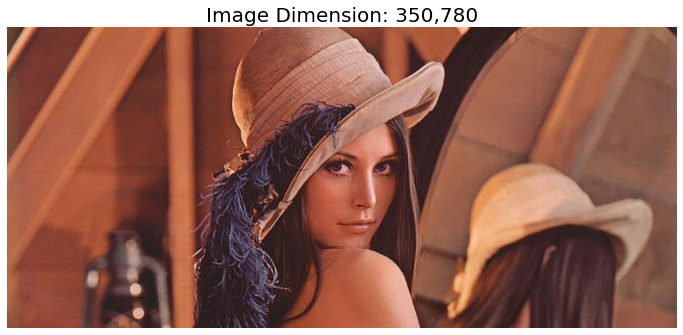

In [15]:
from sklearn.decomposition import PCA
import numpy as np


def patchify(img, ps=(10, 10)):
    patches = []
    h, w = img.shape
    for i in range(0, h, ps[0]):
        for j in range(0, w, ps[1]):
            patches.append(img[i:i+ps[0], j:j+ps[1]].ravel()) 
    return np.array(patches)


def depatchify(patches, patch_size=(10, 10), img_size=(350, 780)):
    # normalize
    patches[patches > 255.] = 255.
    patches[patches < 0.] = 0.
    
    # convert to unint8
    patches = patches.astype('uint8')
    rec_img = np.zeros(img_size, dtype='uint8')
    ph, pw = patch_size
    
    h, w = img_size
    x = 0
    for i in range(0, h, ph):
        for j in range(0, w, pw):
            rec_img[i:i+ph, j:j+pw] = patches[x].reshape((ph, pw))
            x += 1
            
    return rec_img

def convert_to_cf(img_cl):
    # convert image to channel first
    img_cf = np.swapaxes(img_cl.T, 1, 2)
    return img_cf

image=imread('leena.jpg')
img_cf = convert_to_cf(image)

# I'll patchify each channel and depatchify them
# Then I'll stack them together to create original image back
ch1 = depatchify(patchify(img_cf[0])) # first channel
ch2 = depatchify(patchify(img_cf[1])) # second channel
ch3 = depatchify(patchify(img_cf[2])) # third channel

# combine them now
rec_img = np.dstack((ch1, ch2, ch3))
plt.figure(figsize=(12, 12))
show_image(rec_img)

**STEP 3: Compressing a single channel of an image (FILL TWO FUNCTIONS BELOW)**

Now you are familiar with how `patchify` and `depatchify` work. Do the following:

1. Write a function `compress` that takes a single image's channel as its input. And it returns the compressed version of channel and the auxiliary data required for decompressing it. Return type of this function should be dictionary.
2. Write another function `decompress` that will take the dictionary data you returned from the previous `compress` function. This funcion should decompress the dictionary data to an image channel (that was compressed).
3. PCA compression is lossy compression algorithm -- means you will loose the information during the decompression phase.
4. We should be able to call two of your functions like so `decompress(compress(img_ch[0]))` to compress and decompress the given image's channel.

**Compress: Pseudo code**
- `Patchify` the given image's channel (input).
- Run `PCA` on the patches (you may use sklearn's implementation) to reduce them to `5d` vectors.
- You will need `basis vectors` or `principal components` and `mean` in order to reconstruct the data back to `100d`
- Return dictionary: `{'compressed_patches': 5d vectors, 'aux_data': principal components/basis vectors/means/final size of image}`
- By converting `100d` to `5d`, you reduce size by `20` times.

**Decompress: Pseudo code**
- Input is dictionary as returned by your `compress` function.
- Use `5d` vectors and do inverse PCA (check tutorial 2) and convert them back to `100d` vectors.
- Use `depatchify` function to convert these reconstructed `100d` vectors into an image channel

**Tip**:  Good code is always modular and easy to read.

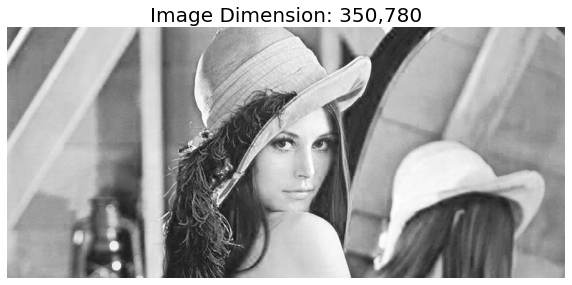

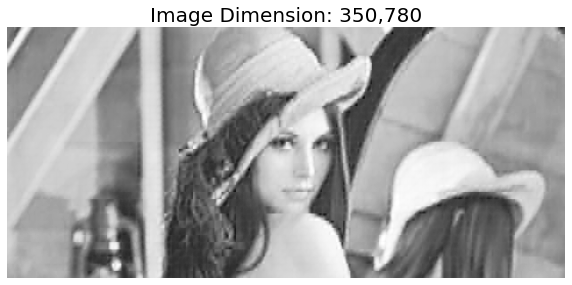

In [16]:
# COMPLETE FOLLOWING FUNCTIONS

def compress(img_ch, n_components=5):
    """
    Inputs
        img_ch: one of the channel of given image
        n_components: number of components returned by PCA
    Returns
        comp_data: Some data structure (may be dict.) that represents compressed form of given input
        along with auxiliary data required for decompression (components_, mean_ and shape of input image)
    """
   
    # patchify img_ch
    patches = patchify(img_ch)
    # ADD CODE HERE!!
    
    #obtain PCA components and means
    pca = PCA(n_components)
    pca.fit(patches)

    #compress patches
    compressed_data = pca.transform(patches)

    #obtain auxiliary data
    auxiliary_data = [pca.components_, pca.mean_, img_ch.shape]
    return {'y': compressed_data, 'aux_data': auxiliary_data}
    pass

def decompress(comp_data):
    """
    Inputs
        comp_data: data structure that is returned by `compress` function
    Returns
        img_ch: decompressed form of channel compressed and contained inside `comp_data` data structure
    """
    #get compressed data and auxiliary data
    compressed_data = comp_data['y']
    components, means, img_size = comp_data['aux_data']
    
    # recontruct the patches to 100d using aux_data and inverse PCA
    # depatchify and return img_ch
    rec_patches = np.dot(compressed_data, components) + means
    img_ch = depatchify(rec_patches)
    return img_ch

# Red channel
# visualize your compression and decompression
img_ch = img_cf[0]
plt.figure(figsize=(10, 10))
show_image(img_ch)

plt.figure(figsize=(10, 10))
show_image(decompress(compress(img_ch, n_components=5)))

**STEP 3: Compress and decompress entire image (FILL TWO MORE FUNCTIONS)**

Write a `compress_image` function that:

- takes `channel last` (regular image read from `imread`) representation of an image
- convert `channel last` to `channel first` representation using `convert_to_cf` function defined previously
- compresses each of the channel using `compress` function
- Return a single dictionary that contains all auxiliary data required to reconstruct/decompress the entire image back.

Similarly, write `decompress_image` function that:

- decompresses the image compressed by `compress_image` function 
- return `channel last` image

**NOTE:** You would patchify each channel and implement PCA on each channel thus for decompression you need `components_`, `mean_` for each channel and you need shape of input image as well.

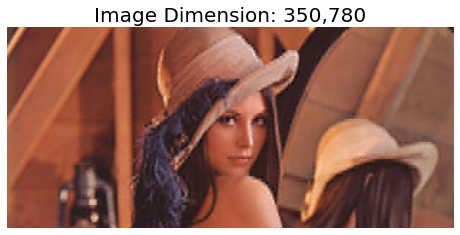

In [17]:
def compress_image(img, n_components=5):
    """
    Inputs:
        img_cf: `Channel last` image data
    """
    img_cf = convert_to_cf(img)
    return {'1': compress(img_cf[0], n_components), '2': compress(img_cf[1], n_components), '3': compress(img_cf[2], n_components)}
    
def decompress_image(comp_img):
    """
    Returns:
        img_rec: Decompressed `channel last` image
    """
    ch1 = decompress(comp_img['1'])
    ch2 = decompress(comp_img['2'])
    ch3 = decompress(comp_img['3'])
    return np.dstack((ch1, ch2, ch3))

plt.figure(figsize=(8, 8))
show_image(decompress_image(compress_image(image)))


**STEP 4: Serialization and de-serialization**

You can easily (de)serialize dictionary using `np.save` and `np.load` (see example below)

`compress_and_serialize` should:
- Read image given by `inp_path`
- Use `compress_image` to compress it
- Serialize the compressed data using `np.save` to a file specified by `out_path`

**NOTE:** All the data required for deserialization must be saved to a one single file only.

`deserialize_and_decompress` should:
- Read the file specified by `inp_path` using `np.load`
- Use `decompress_image` function to decompress it
- Return image (channel last as returned by `decompress_image`) function

In [18]:
# EXAMPLE OF SAVING AND LOADING DICTIONARY OBJECT TO/FROM FILESYSTEM
d = {'a': [1, 2, 3], 'b': [4, 5, 6, 7, 8]}
np.save('example.npy', d)

ds = np.load('example.npy', allow_pickle=True).item()

ds

{'a': [1, 2, 3], 'b': [4, 5, 6, 7, 8]}

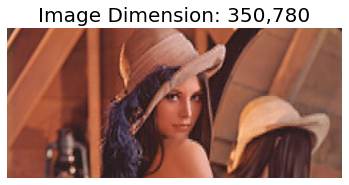

In [19]:
# COMPLETE THESE TWO FUNCTIONS
def compress_and_serialize(inp_path='leena.jpg', out_path='output.bin'):
    image = imread(inp_path)
    comp_img = compress_image(image)
    np.save(out_path, comp_img)

def deserialize_and_decompress(inp_path='output.bin'):
    compress = np.load(inp_path, allow_pickle=True).item()
    return decompress_image(compress)

compress_and_serialize()
show_image(deserialize_and_decompress())

**STEP 5: What is the size of output.bin file?**

Did you end of in compressing anything? Conclude your experiments!

**Conclusion**

Write your conclusion here!!

Compressed bytes is higher than original image due to output.bin containing all the metadata.


In [20]:
import os

print('Original', os.path.getsize('leena.jpg'), 'bytes')
print('Compressed', os.path.getsize('output.bin'), 'bytes')

Original 35740 bytes
Compressed 498280 bytes


## Task 2: Rotation and Translation Invariance in PCA

**STEP 1 (done already): Create normally distributed datapoints**

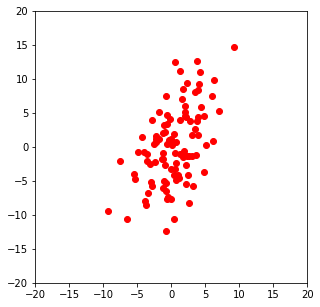

In [21]:
mean = [0, 0]
cov = [[10, 10], [10, 40]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov, 100).T
X = np.array(list(zip(x, y)))

def plot_data(X):
    plt.figure(figsize=(5, 5))
    plt.plot(X[:, 0], X[:, 1], 'ro')
    plt.xlim([-20, 20])
    plt.ylim([-20, 20])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
plot_data(X)

**STEP 2: Rotate the data by 45 degrees and create new datapoints X_rot**

Write a code to rotate X by 45$^\circ$

- Use rotation matrix
- Or individually rotate each point in `X` by 45 degrees
- Use `plot_data` function defined in cell above to visualize the rotated data

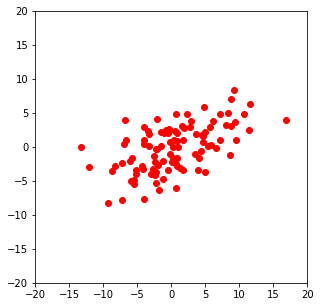

In [22]:
theta = np.radians(45)
# WRITE CODE HERE
# Code to rotate X
cos, sin = np.cos(theta), np.sin(theta)
R = np.array(((cos,-sin), (sin, cos)))

# populate new matrix X_rot
X_rot = X.dot(R)
plot_data(X_rot)

**STEP 3 (done but need explanation): Perform pca with n_components=2**

Do you see anything interesting?

Explain the code below and write down your observations (2-3 lines only).


**Observations**

PCA transform of X is the same as rotation of X. It's also a rotational invariant.

In [23]:
import pandas as pd

def visualize_components(X, X_rot):
    pca = PCA(n_components=2)

    pca.fit(X)
    df1 = pd.DataFrame(pca.fit_transform(X))
    df2 = pd.DataFrame(pca.fit_transform(X_rot))

    return pd.concat((df1, df2), axis=1)[:20]
    
visualize_components(X, X_rot)

,0,1,0,1
0,-0.070857,0.212112,-0.070857,0.212112
1,-0.949604,-0.583555,-0.949604,-0.583555
2,4.586861,-1.904516,4.586861,-1.904516
3,-4.543231,-4.755375,-4.543231,-4.755375
4,-6.409232,-0.666721,-6.409232,-0.666721
5,-6.724329,-1.246919,-6.724329,-1.246919
6,-0.139641,1.043437,-0.139641,1.043437
7,-1.590813,1.073460,-1.590813,1.073460
8,0.740945,0.668100,0.740945,0.668100
9,4.592496,-0.239851,4.592496,-0.239851


**STEP 4: Perform PCA again and find angle between principal components**

- Perform PCA on X and X_rot with n_components=1
- It will give one basis vector for each of data (X and X_rot)
- Find the angle between these two basis vectors
- Explain your observations?

**Observations**

The two basis vectors are 45deg from one another since X_rot is 45deg from X.

In [24]:
import math
from numpy.linalg import norm

def angle_between(a,b):
    # COMPLETE THIS FUNCTION
    # CALCULATE ANGLE IN RAD BETWEEN TWO VECTORS
    dot_product = np.dot(a,b)
    length_A = norm(a)
    length_B = norm(b)
    return math.acos(dot_product / (length_A*length_B))

pca = PCA(n_components=1)
pca.fit(X)
c1 = pca.components_

pca.fit(X_rot)
c2 = pca.components_

np.rad2deg(angle_between(c1[0], c2[0]))

44.999999999999986

**(NO MARKS) STEP 5: Repeat these experiments for translation as well**

There is not marks for this part. You can do this for your own learning.

Now translate every point in `X` by fixed `x` and `y` amount.

`X = X + [1, 2]`

like so and repeat all the above experiments in cell below and write down your observations:

In [0]:
# PERFORM EXPERIMENTS WITH TRANSLATION HERE
# NO MARKS FOR DOING THIS

## TASK 3: Recovery of corrupted images using PCA

Check the code below.

It corrupts the `leena.jpg` image that you worked on before.

Check very carefully what below code is doing on the image and answer:

**Is it same as rotation of data points (like done before), if yes explain (just one liner)?**

No the corruption is random.

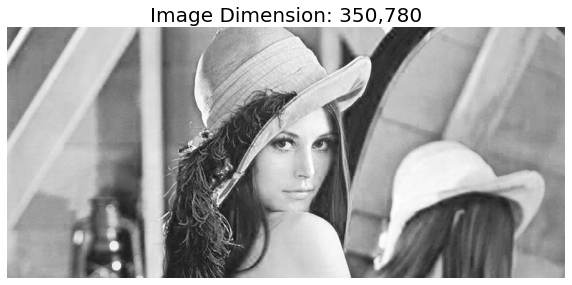

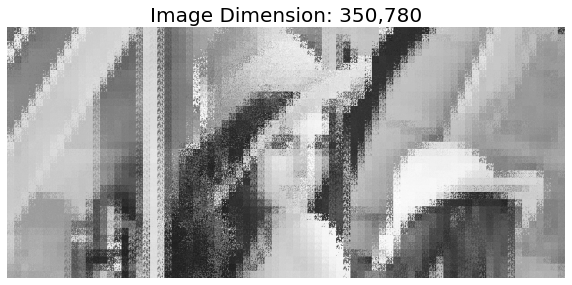

In [26]:
# Code for corrupting the leena image
image = convert_to_cf(imread('leena.jpg'))[0]

def corrupt_image(img):
    # lets patchify R channel with patches of 35x78 patches
    patches = patchify(img)
    
    # Noise 1:
    # lets jumble pixels of patches now
    jumble_idx = list(range(len(patches[0])))
    np.random.shuffle(jumble_idx)
    
    jumbled_patches = np.array([patch[jumble_idx] for patch in patches])
    rec_jumbled_image = depatchify(jumbled_patches, img_size=img.shape)
    
    return rec_jumbled_image


cimage = corrupt_image(image)

plt.figure(figsize=(10,10))
show_image(image)

plt.figure(figsize=(10,10))
show_image(cimage)

**Recovering from the corruption**

Use the `compress` function you coded earlier to get compressed form of original leena image and corrupted leena image.

We will try to recover the corrupted leena given the compressed version of the original leena.

Notice in the code below, I replaced `aux_data` of the corrupted version with `aux_data` of the original version.

Does the code below work in recovering the original leena image back?

**Explain how the code works and show it actually works?**

The code brings the original leena image back. It compresses the corrupted image (from before) and replaces the aux_data with the original leena image's aux_data.

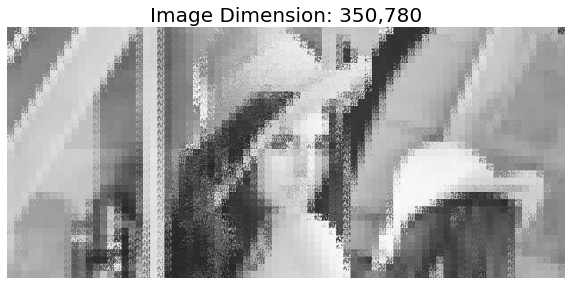

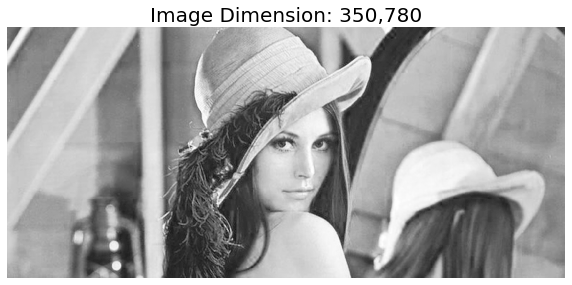

In [27]:
# This assuming your compress function returns dictionary which contains `aux_data`
# if you coded your compress in diferent way then change code below appropriately
# basically you need to replace auxiliary data of corrupted with original while keeping compressed (transformed) data same
d = compress(image, n_components=50)
d1 = compress(cimage, n_components=50)

plt.figure(figsize=(10, 10))
show_image(decompress(d1))

d1['aux_data'] = d['aux_data']
plt.figure(figsize=(10, 10))
show_image(decompress(d1))

## Task 4: Decrypting manuscript of the lost civilization

You belong to one of the advanced civilizations.  While exploring the universe you landed on the planet Earth. However, there are no inhabitants on the planet anymore. While your exploration, you came across a damaged hard drive that contains various images. You suspect that these images represent digits as written by people of Earth. You recovered all the data from the hard drive safely. You opened up your Google Colab (python is popular among alien species and Google is still working while Earth has no inhabitants), you started plotting the images you just recovered. 

In [28]:
rimages = np.load('recovered_images.npy')
rimages.shape

(20, 28, 28)

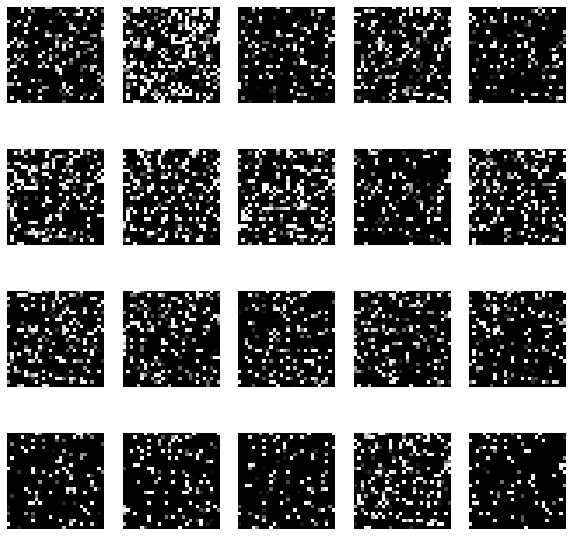

In [29]:
def plot_manuscript(images):
    for i, img in enumerate(images):
        plt.subplot(4, 5, i+1)
        plt.imshow(img, cmap='Greys_r')
        plt.axis('off')
        
plt.figure(figsize=(10, 10))
plot_manuscript(rimages)

You are a smart alien, and you've figured out that these images are encrypted, and are not in their original form. You also figured out that encryption is just the jumbling of pixels in **a fixed pattern**. Since you're unaware of the manuscript, you cannot decrypt the images just by themselves even if they follow the fixed jumbling pattern. However, fortunately you found the `principal components` and `mean` of the the original manuscript somewhere in the same harddisk. Now, your task is to recover all the 20 images and plot them nicely in the cell below.

Use `plot_manuscript` function from above to plot the recovered manuscript.

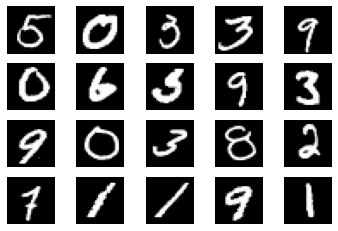

In [30]:
original_components = np.load('original_pca.npy')
original_mean = np.load('original_mean.npy')

# Write your code here
rimages.shape = (20, 784)

n_components = 20
pca = PCA(n_components)
pca.fit(rimages)
transform = pca.transform(rimages)

decomp = np.dot(transform, original_components) + original_mean
decomp.shape = (20, 28, 28)

# plot manuscript
plot_manuscript(decomp)